# Evaluation

In [1]:
import sys
sys.path.append('..')

In [2]:
# Loading useful libraries

import numpy as np
import pandas as pd

import pickle

from sklearn.metrics import accuracy_score, f1_score, PrecisionRecallDisplay, precision_score, recall_score, r2_score

import Demo2

In [3]:
# Selecting "regression" or "classification"

model_type = "classification"

assert(model_type in ["regression", "classification"])

In [4]:
# Loading data

X_test = pd.read_csv(f'../tmp/X_test_{model_type}.csv', index_col='User_ID')
y_test = pd.read_csv(f'../tmp/y_test_{model_type}.csv', index_col='User_ID')['is_BigSpender']


# Loading model

with open('../tmp/model.pkl', 'rb') as f:
    model = pickle.load(f)

with open('../tmp/best_threshold.pkl', 'rb') as f:
    best_threshold = pickle.load(f)

In [5]:
# Evaluating model performance on the test set
score_test = Demo2.evaluation.evaluate(model, X_test, y_test, model_type=model_type, classification_threshold=best_threshold)
score_test

0.5379146919431279

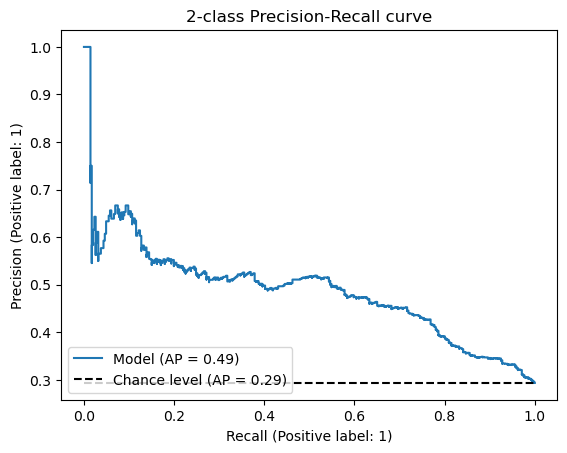

In [6]:
# Plotting precision-recall curve (for classification)
if model_type == "classification":
    display = PrecisionRecallDisplay.from_estimator(
        model, X_test, y_test, name="Model", plot_chance_level=True
    )
    _ = display.ax_.set_title("2-class Precision-Recall curve")

In [7]:
# Computing accuracy, precision and recall (for classification)
if model_type == "classification":
    print(
    f"""Accuracy: {Demo2.evaluation.evaluate(model, X_test, y_test, model_type=model_type, metric=accuracy_score, classification_threshold=best_threshold)}
Precision: {Demo2.evaluation.evaluate(model, X_test, y_test, model_type=model_type, metric=precision_score, classification_threshold=best_threshold)}
Recall: {Demo2.evaluation.evaluate(model, X_test, y_test, model_type=model_type, metric=recall_score, classification_threshold=best_threshold)}""")

Accuracy: 0.6692111959287532
Precision: 0.45582329317269077
Recall: 0.6560693641618497
